In [53]:
from scipy.stats import median_abs_deviation

import sys
sys.path.insert(0, '/home/workspace/mm_analysis')
sys.path.insert(0, '/home/workspace/')

from py_util import *
from utilities import *

hdir = '/home/workspace'
wdir = hdir + "/mm_analysis/EXP-01244"
objdir1 = wdir + "/processing/objects/"
objdir2 = wdir + "/annotations/objects/"
degdir = wdir + "/deg_list/"

adata = sc.read_h5ad(objdir1 + "ds_processed_all_organoids_adata.h5ad")

adata_type = "All Organoids (downsampled)"

target = 'mono_'
labels = pd.read_csv(hdir + "/mm_analysis/bm_cell_label_reference.csv").iloc[:, 1:5]
labels = labels[labels.iloc[:,1].str.contains(target)]

exclude = ['CD16', 'GKMZ', 'HLA-DRA', 'ILRB2', 'ITGAE', 'STI4', 'VPREB2']

markers = {
    celltype: genes.split(", ")
    for celltype, genes in zip(labels.iloc[:, 1], labels.iloc[:, 2])
}

markers = {
    celltype: [gene for gene in genes if gene not in exclude]
    for celltype, genes in markers.items()
}

markers.keys()

dict_keys(['mono_cd14', 'mono_cd16', 'mono_intermediate'])

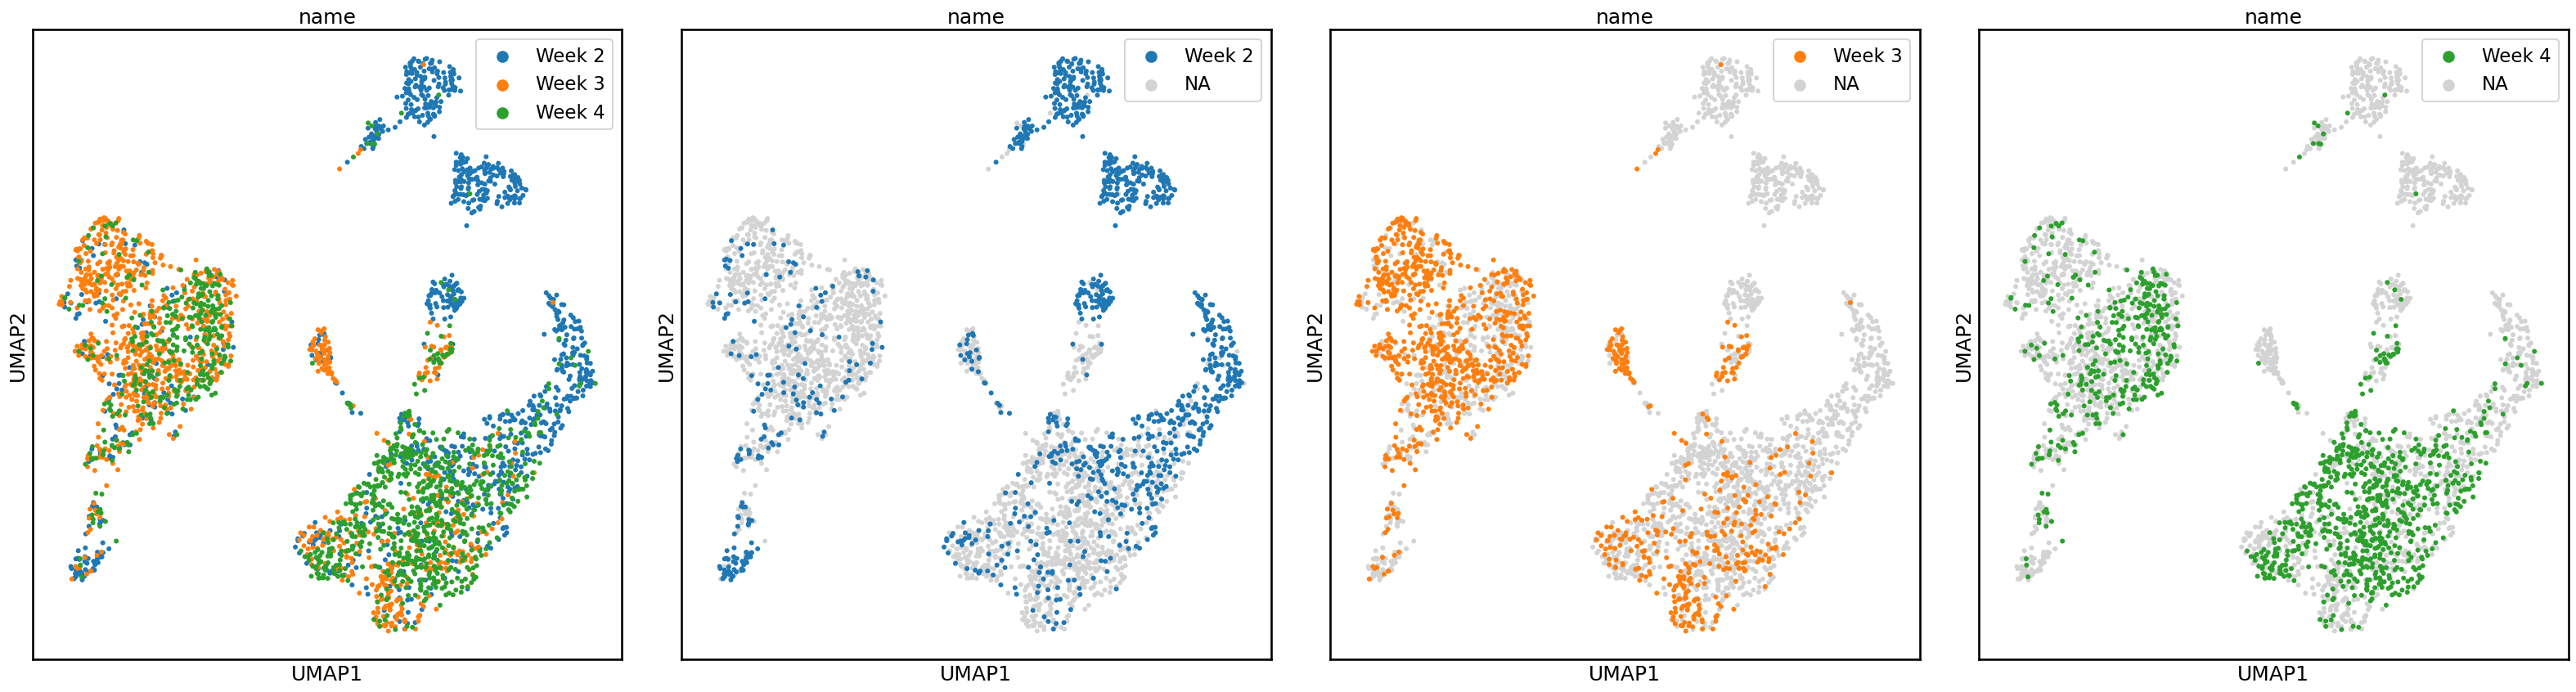

In [81]:
fig, ax, idx = subplot_grids(4, aspect_ratio=4, gridspec_kw={'wspace': 0.1})

for i in idx:
    sc.pl.umap(
        adata,
        color='name',
        groups='Week 2' if i == idx[1] else ('Week 3' if i == idx[2] else ('Week 4' if i == idx[3] else None)),
        show=False,
        ax=ax[i],
        legend_loc='best',
        size=75
    )

Text(0.5, 0.91, 'All Organoids (downsampled): Leiden Resolutions')

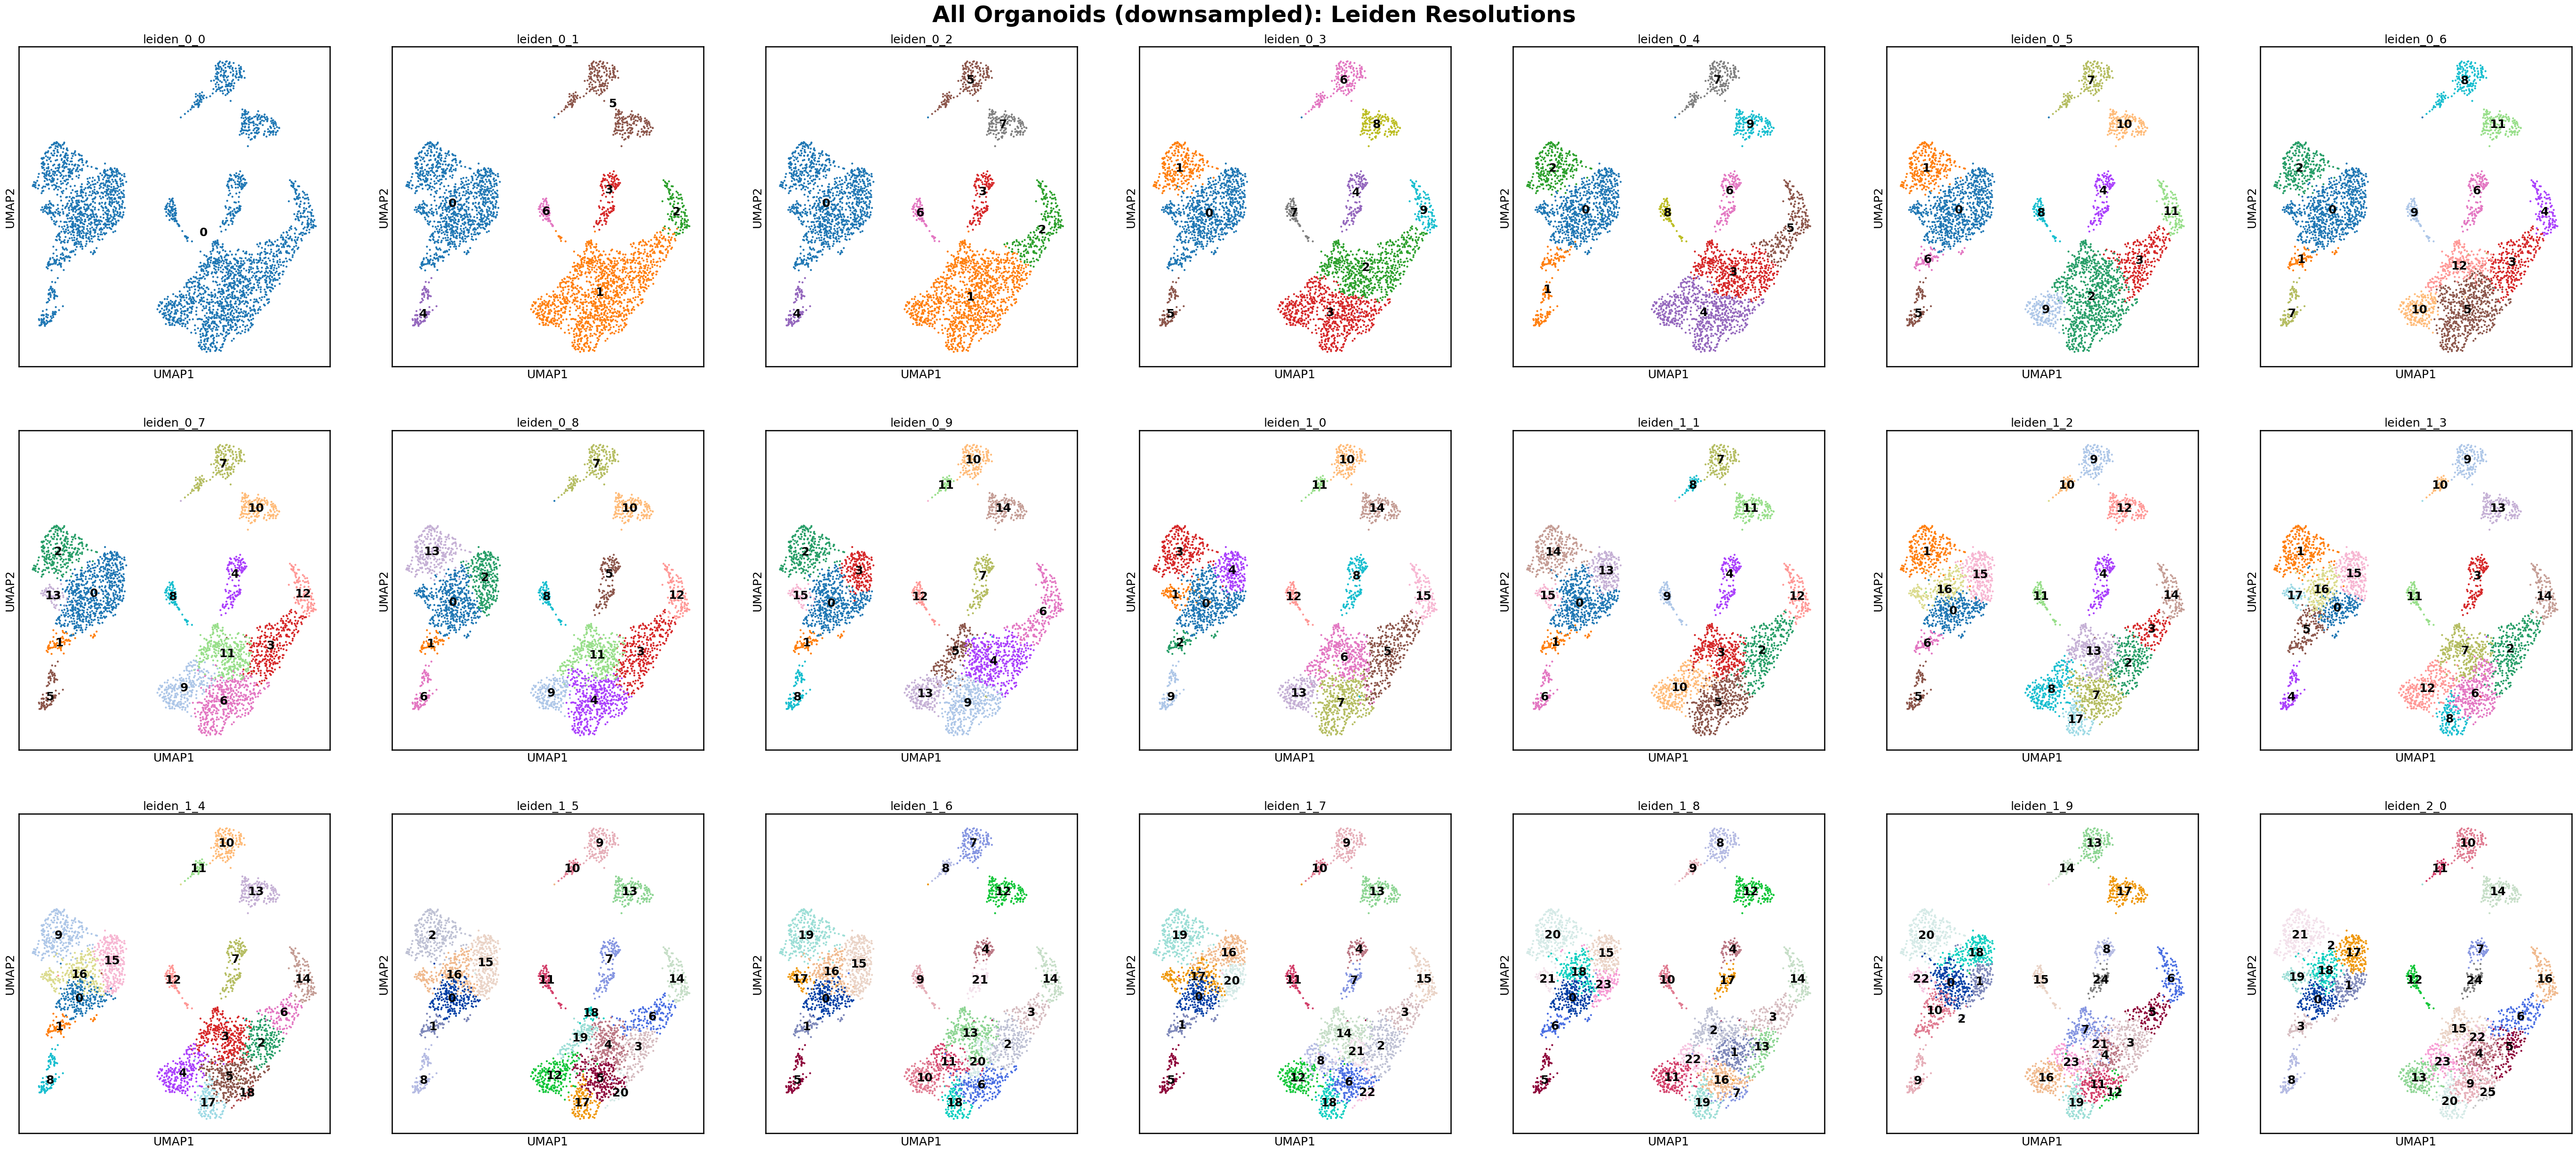

In [82]:
colors = list(adata.uns['leiden_ranges'])

fig, ax, idx = subplot_grids(len(colors), aspect_ratio=2)

for i, color in zip(idx, colors):
    sc.pl.umap(
        adata,
        color=color,
        show=False,
        ax=ax[i],
        legend_loc='on data'
    )
    
fig.suptitle(f'{adata_type}: Leiden Resolutions', y=.91, fontweight='bold', fontsize=35)

In [48]:
sc.tl.rank_genes_groups(
    adata,
    groupby='leiden_0_3',
    method='wilcoxon',
    n_genes=20,
    key_added='ranke_genes_groups_l1'
)

ranking = adata.uns['rank_genes_groups']
gene_names = ranking['names']
gene_z_scores = ranking['scores']
gene_logfold = ranking['logfoldchanges']
gene_pvals_adj = ranking['pvals_adj']
clusters = gene_names.dtype.names

df_de_genes = pd.DataFrame()

for cluster in clusters:
    names = gene_names[cluster]
    logfold = gene_logfold[cluster]
    z_scores = gene_z_scores[cluster]
    pvals_adj = gene_pvals_adj[cluster]

    # All genes 
    cluster_df = pd.DataFrame({
        f'C{cluster}_names': names,
        f'C{cluster}_logfold': logfold,
        f'C{cluster}_pvals_adj': pvals_adj,
        f'C{cluster}_z_score': z_scores
    })

    if df_de_genes.empty:
        df_de_genes = cluster_df
    else:
        df_de_genes = pd.merge(df_de_genes, cluster_df, left_index=True, right_index=True, how='outer')

df_de_genes.to_csv(degdir + 'adjusted_ds_l1_all_organoids_DEGs.csv', index=False)

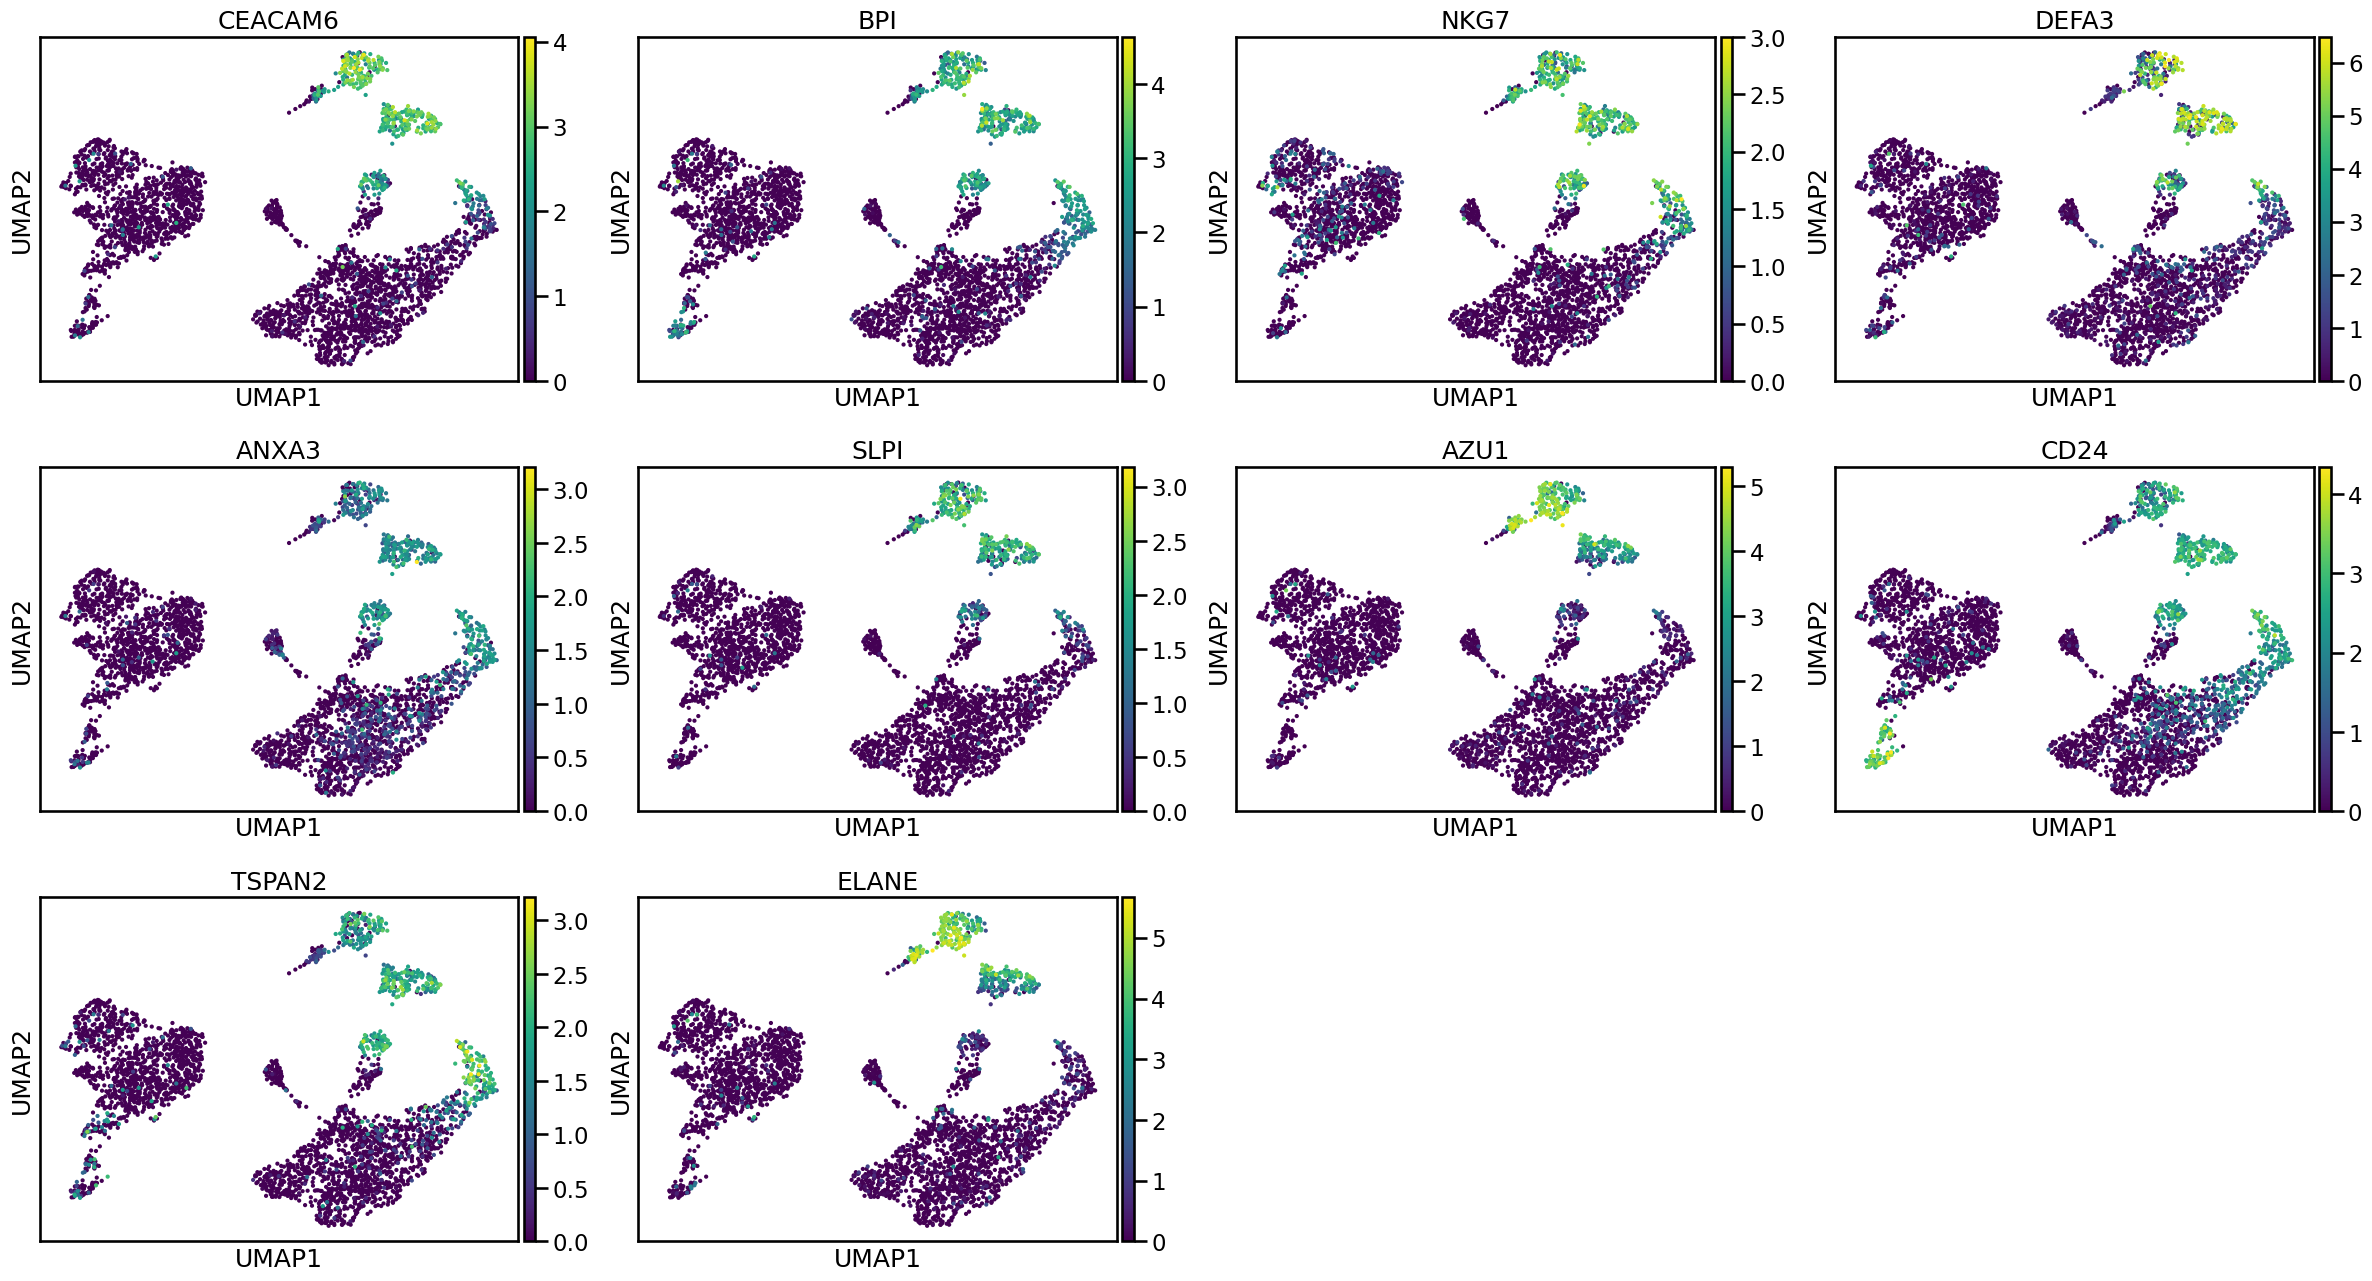

In [41]:
cl8_markers = ['CEACAM6', 'BPI', 'NKG7', 'DEFA3', 'ANXA3', 'SLPI', 'AZU1', 'CD24', 'TSPAN2', 'ELANE']

sc.pl.umap(
    adata,
    color=cl8_markers
)

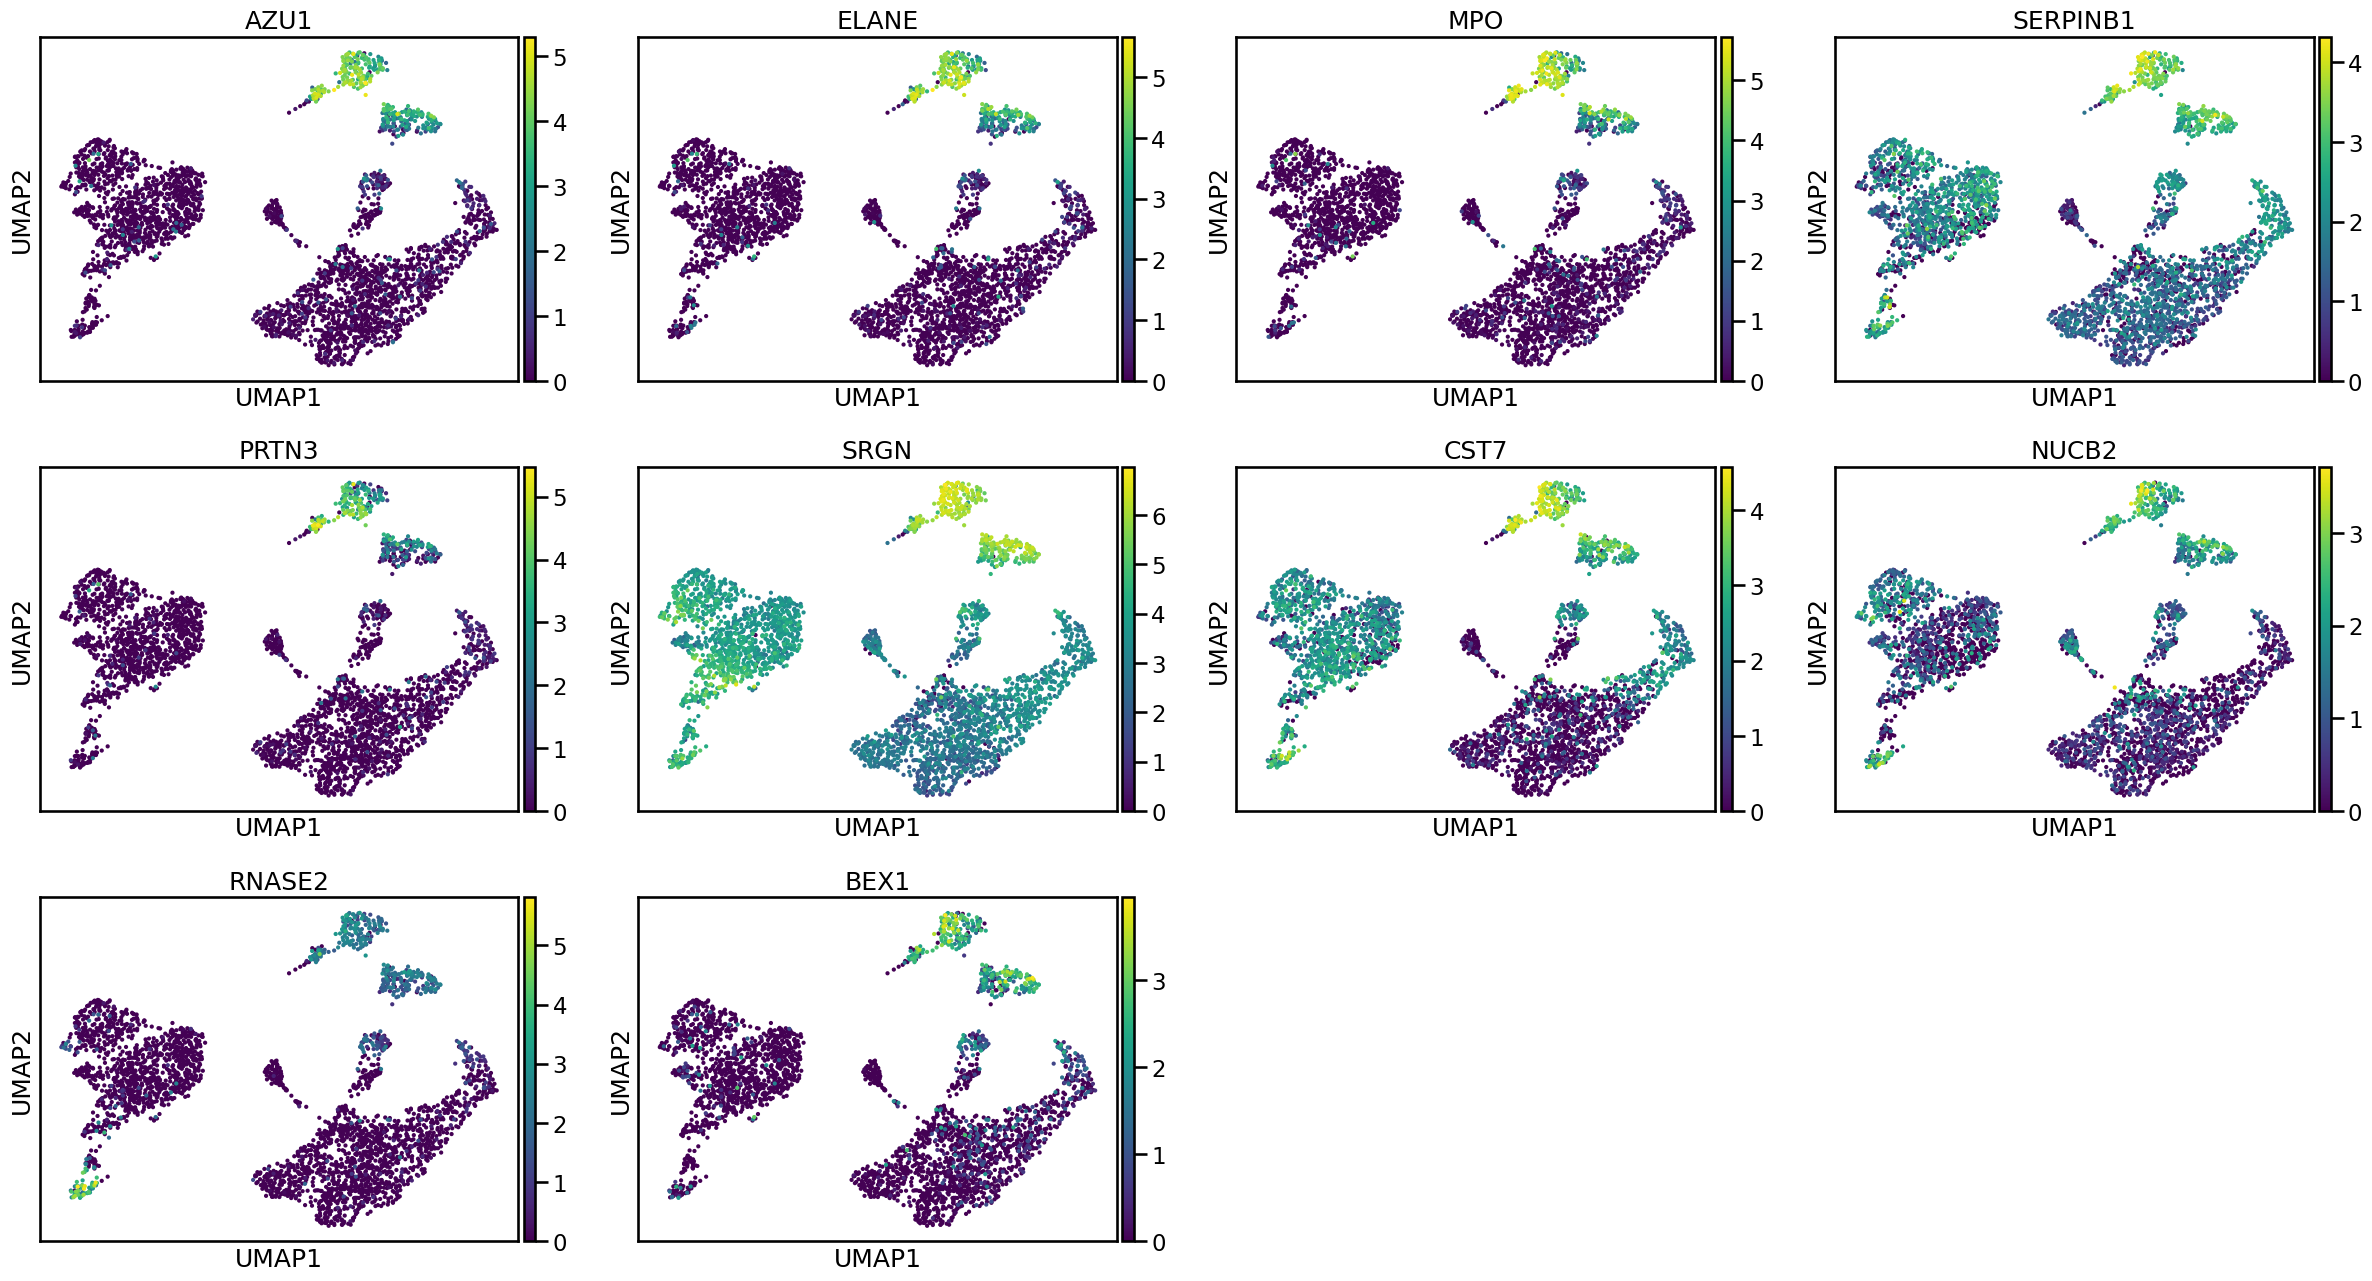

In [39]:
cl6_markers = ['AZU1', 'ELANE', 'MPO', 'SERPINB1', 'PRTN3', 'SRGN', 'CST7', 'NUCB2', 'RNASE2', 'BEX1']

# AZU1,ELANE,MPO,SERPINB1,PRTN3,SRGN,CST7,NUCB2,RNASE2,BEX1

sc.pl.umap(
    adata,
    color=cl6_markers
)

In [69]:
l1 = {cluster: cluster for cluster in sorted(adata.obs['leiden_0_3'].unique(), key=int)}

l1['6'] = 'CMP'
l1['8'] = 'CMP'

{'0': '0',
 '1': '1',
 '2': '2',
 '3': '3',
 '4': '4',
 '5': '5',
 '6': 'g',
 '7': '7',
 '8': '8',
 '9': '9'}

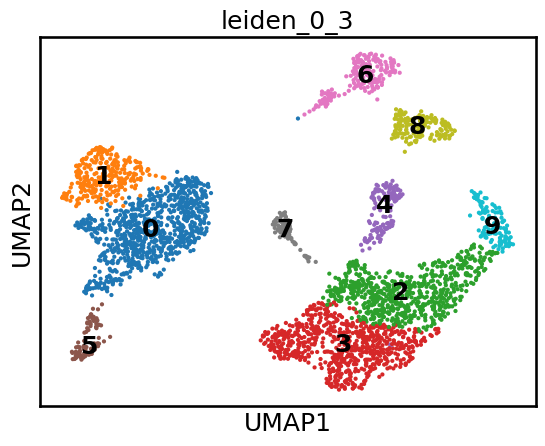

In [55]:
sc.pl.umap(
    adata,
    color='leiden_0_3',
    legend_loc='on data'
)